<a href="https://colab.research.google.com/github/AzadMehedi/ML-Algorithoms/blob/main/Hierarchical_Clustering(Unsupervised).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

In [5]:
url = 'https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-wholesale-customers.csv'
df = pd.read_csv(url)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
# normalize the entire dataset for cluustering

data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Creating a dendrogram of the normalized dataset will produce a graph like the image below. We constructed this dendrogram using word linkage method. We can create dendrograms in other ways as well.

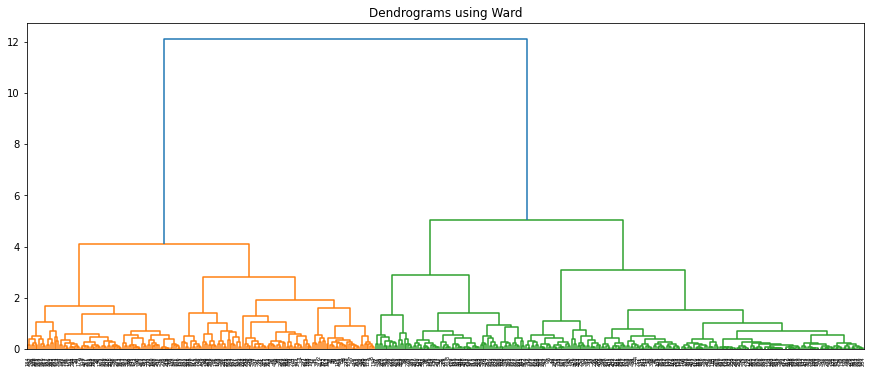

In [10]:
# using ward
plt.figure(figsize=(15,6))
plt.title('Dendrograms using Ward')
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.show()

different methods for creating dendrogram

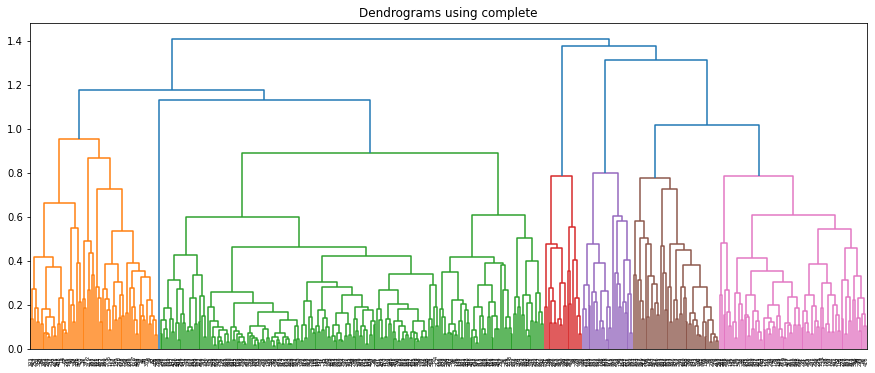

In [17]:
# using complete
plt.figure(figsize=(15,6))
plt.title('Dendrograms using complete')
dend = shc.dendrogram(shc.linkage(data_scaled, method='complete'))
plt.show()

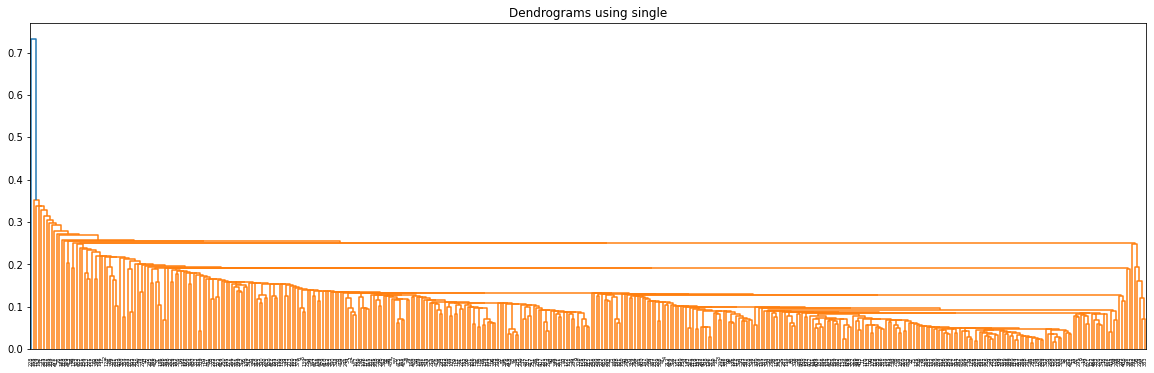

In [21]:
# using single
plt.figure(figsize=(20,6))
plt.title('Dendrograms using single')
dend = shc.dendrogram(shc.linkage(data_scaled, method='single'))
plt.show()

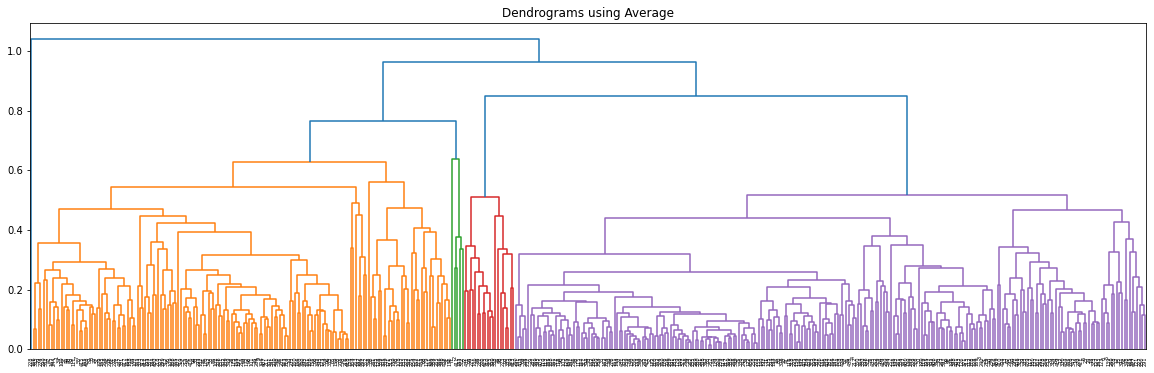

In [18]:
# using average
plt.figure(figsize=(20,6))
plt.title('Dendrograms using Average')
dend = shc.dendrogram(shc.linkage(data_scaled, method='average'))
plt.show()

In `Dendrograms ward method` The blue line is the maximum distance of 6 for the two largest clusters formed (after which no new clusters are formed and the distance does not increase). We will draw a line for this distance, to facilitate our understanding.

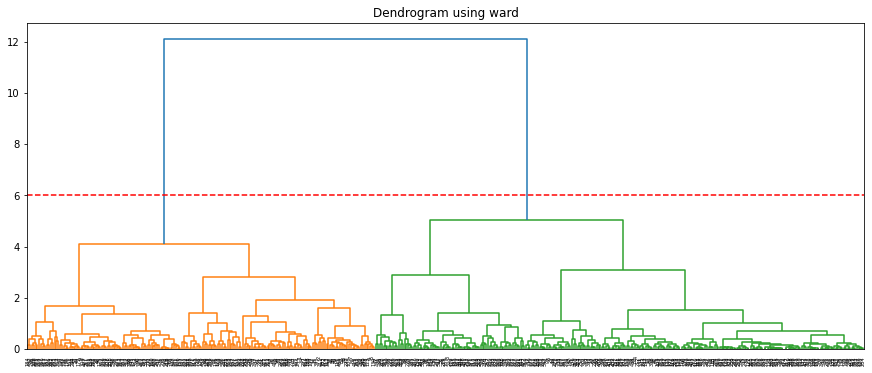

In [24]:
plt.figure(figsize=(15,6))
plt.title('Dendrogram using ward')
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

Since we got two clusters for maximum distance, let's do agglomerative clustering with two clusters,


In [32]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

In [33]:
df['cluster_'] = cluster.labels_
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0


We will now look at the group by mean value of the cluster, as a result of which we understand how the average product of any type is sold in any cluster.

In [36]:
agg_wholesale = df.groupby(['cluster_', 'Channel'])['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'].mean()
agg_wholesale

Fresh          Milk       Grocery       Frozen  \
cluster_ Channel                                                          
0        1        16860.357143   2698.299107   3444.459821  4348.428571   
         2        18338.121212   5203.333333   8186.818182  2179.909091   
1        1         3229.689189   5732.364865   5529.162162  1931.500000   
         2         6048.220183  12385.623853  18786.055046  1492.972477   

                  Detergents_Paper   Delicassen  
cluster_ Channel                                 
0        1              564.209821  1267.477679  
         2             2876.909091  1684.909091  
1        1             1475.729730  1865.405405  
         2             8599.376147  1774.183486


We can create scatter plots with cluster labels for our desire variables.

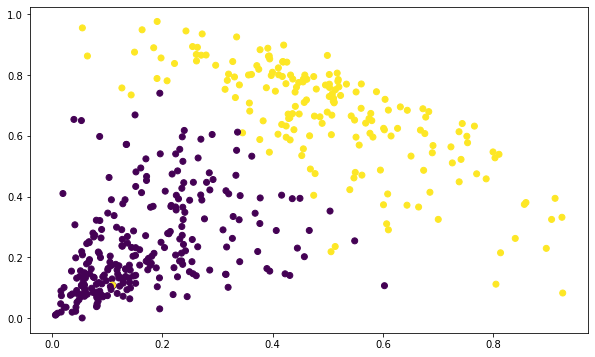

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)